In [83]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [84]:
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print( iris.head() )

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [85]:
#convert iris data to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()
labels = torch.zeros(len(data),dtype=torch.long)


# transform species to number
# labels[iris.species=='setosa'] = 1
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [86]:
data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [87]:
def createModel(hiddenLayers):
  ANNIris = nn.Sequential(
      nn.Linear(4, hiddenLayers),
      nn.ReLU(),
      nn.Linear(hiddenLayers, hiddenLayers),
      nn.ReLU(),
      nn.Linear(hiddenLayers, 3),
      # nn.Softmax()
  )
  
  lossfun = nn.CrossEntropyLoss()
  
  optimizer = torch.optim.SGD(ANNIris.parameters(), lr=.01)
  
  return ANNIris, lossfun, optimizer

In [88]:
#train the model
def trainModel(ANNIris):
  # initialize losses
  losses=torch.zeros(epochs)


# loop over epochs
  for epoch in range(epochs):
    
    #forward pass
    yHat= ANNIris(data)
    
    #compute loss
    loss = lossfun(yHat, labels)
    losses[epoch]=loss
    
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  #final foward pass  
  predictions=ANNIris(data)
  
  predlabels=torch.argmax(predictions,axis=1)
  return 100*torch.mean((predlabels==labels).float())

In [89]:
# RUn the experiment
epochs = 150
hiddenLayers=np.arange(1,129)
accuracies=[]

for layer in hiddenLayers:
  ANNIris,lossfun,optimizer = createModel(layer)
  acc = trainModel(ANNIris)
  accuracies.append(acc)

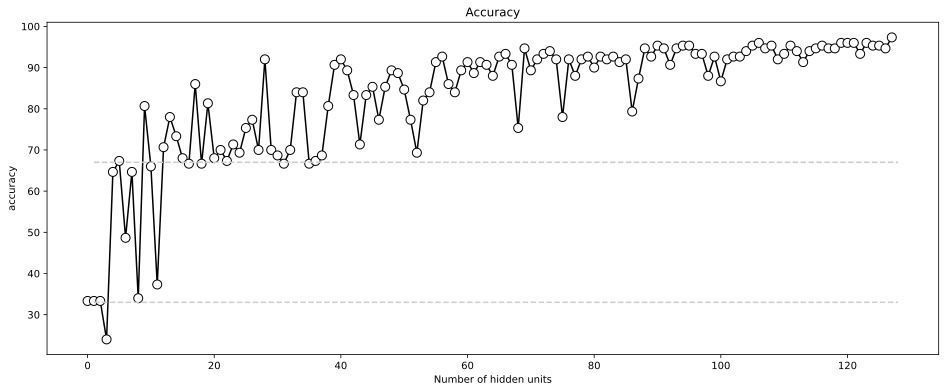

In [90]:
fig,ax = plt.subplots(1,figsize=(16,6))

ax.plot(accuracies,'ko-',markerfacecolor='w',markersize=9)
ax.plot(hiddenLayers[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(hiddenLayers[[0,-1]],[67,67],'--',color=[.8,.8,.8])
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()